<a href="https://colab.research.google.com/github/2k3sonnguyen/machine-learning/blob/Nh%C3%B3m-7/Nhom7_H%E1%BB%8DcM%C3%A1y.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phân tích tỷ lệ giữ chân khách hàng**

Khách hàng rời bỏ là thuật ngữ dùng để mô tả thời điểm khách hàng kết thúc mối quan hệ hoặc đăng ký với một công ty hoặc nhà cung cấp dịch vụ. Sự rời bỏ ảnh hưởng đến doanh thu, sự tăng trưởng và lòng trung thành của khách hàng của doanh nghiệp. Bằng cách nghiên cứu tỷ lệ rời bỏ và các tính năng liên quan của nó, các công ty có thể tìm ra cách để giữ chân khách hàng hiện tại, khiến họ hạnh phúc hơn và giảm tỷ lệ rời bỏ. Họ cũng có thể sử dụng các mô hình dự đoán để dự đoán và ngăn chặn tình trạng rời bỏ trong tương lai, đồng thời thực hiện hành động để giữ chân những khách hàng có khả năng rời đi.

# **1 | Statistics and processing**

# **1.1 | Dataset Description**

CustomerID: Mã định danh duy nhất cho mỗi khách hàng

Age: Tuổi của khách hàng

Gender: Giới tính của khách hàng

Tenure: Khoảng thời gian tính bằng tháng mà khách hàng đã sử dụng sản phẩm hoặc dịch vụ của công ty

Usage Frequency: Số lần khách hàng đã sử dụng dịch vụ của công ty trong tháng trước

Support Calls: Số cuộc gọi mà khách hàng đã thực hiện tới bộ phận hỗ trợ khách hàng trong tháng trước

Payment Delay: Số ngày khách hàng trì hoãn thanh toán trong tháng trước

Subscription Type: Loại đăng ký của khách hàng đã chọn

Contract Length: Thời hạn hợp đồng mà khách hàng đã ký với công ty

Total Spend: Tổng số tiền khách hàng đã chi cho sản phẩm, dịch vụ của công ty

Last Interaction: Số ngày kể từ lần tương tác cuối cùng mà khách hàng có với công ty công ty

Churn: Nhãn nhị phân cho biết khách hàng có rời bỏ (1) hay không (0)

# **1.2 | Import Library**

# **1.2.1 | Import Library**

In [ ]:
%matplotlib inline
#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
# 10000, 1, 100

from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# **1.2.2 | Import Files**

In [ ]:
df=pd.read_csv("/content/sample_data/customer_churn_dataset-training-master.csv")

# **2 | Dataframe Investigation**

# **2.1 | Basic Steps**

In [ ]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [ ]:
df = df.drop(columns = 'CustomerID')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Age                440832 non-null  float64
 1   Gender             440832 non-null  object 
 2   Tenure             440832 non-null  float64
 3   Usage Frequency    440832 non-null  float64
 4   Support Calls      440832 non-null  float64
 5   Payment Delay      440832 non-null  float64
 6   Subscription Type  440832 non-null  object 
 7   Contract Length    440832 non-null  object 
 8   Total Spend        440832 non-null  float64
 9   Last Interaction   440832 non-null  float64
 10  Churn              440832 non-null  float64
dtypes: float64(8), object(3)
memory usage: 37.0+ MB


In [ ]:
df.shape

(440833, 11)

In [ ]:
df.describe()

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [ ]:
df.nunique()

Age                     48
Gender                   2
Tenure                  60
Usage Frequency         30
Support Calls           11
Payment Delay           31
Subscription Type        3
Contract Length          3
Total Spend          68363
Last Interaction        30
Churn                    2
dtype: int64

# **2.2 | Null Value Check**

# **2.3 | Unique Value Check**

In [ ]:
# Kiểm tra giá trị null trong từng cột
null_values_by_column = df.isnull().sum()

# Hiển thị kết quả
print("Null values by column:")
print(null_values_by_column)

Null values by column:
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64


Vi dữ liệu không có giá trị thiếu nên không cần xử lý gì


In [ ]:
# Loại bỏ các dòng chứa giá trị NaN
df = df.dropna()

# Hiển thị DataFrame sau khi loại bỏ giá trị NaN
print(df)

         Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0       30.0  Female    39.0             14.0            5.0           18.0   
1       65.0  Female    49.0              1.0           10.0            8.0   
2       55.0  Female    14.0              4.0            6.0           18.0   
3       58.0    Male    38.0             21.0            7.0            7.0   
4       23.0    Male    32.0             20.0            5.0            8.0   
...      ...     ...     ...              ...            ...            ...   
440828  42.0    Male    54.0             15.0            1.0            3.0   
440829  25.0  Female     8.0             13.0            1.0           20.0   
440830  26.0    Male    35.0             27.0            1.0            5.0   
440831  28.0    Male    55.0             14.0            2.0            0.0   
440832  31.0    Male    48.0             20.0            1.0           14.0   

       Subscription Type Contract Length  Total Spe

In [ ]:
df.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

# **3 | Analysis and Visualization**

In [ ]:
# xem số lượng có thuộc tính churn
churn_counts = df['Churn'].value_counts()
print("Số lượng của biến Churn:")
print(churn_counts)

Số lượng của biến Churn:
1.0    249999
0.0    190833
Name: Churn, dtype: int64


In [ ]:
# # Tính toán tỷ lệ churn
# total_customers = df.CustomerID.nunique()
# churned_customers = df[df.Churn == 1]['CustomerID'].nunique()
# churn_rate = churned_customers / total_customers

# # Hiển thị kết quả
# print("The churn rate of our customers is: {:.2f}%".format(churn_rate * 100))

<Axes: title={'center': 'Count of Class'}, xlabel='Churn', ylabel='count'>

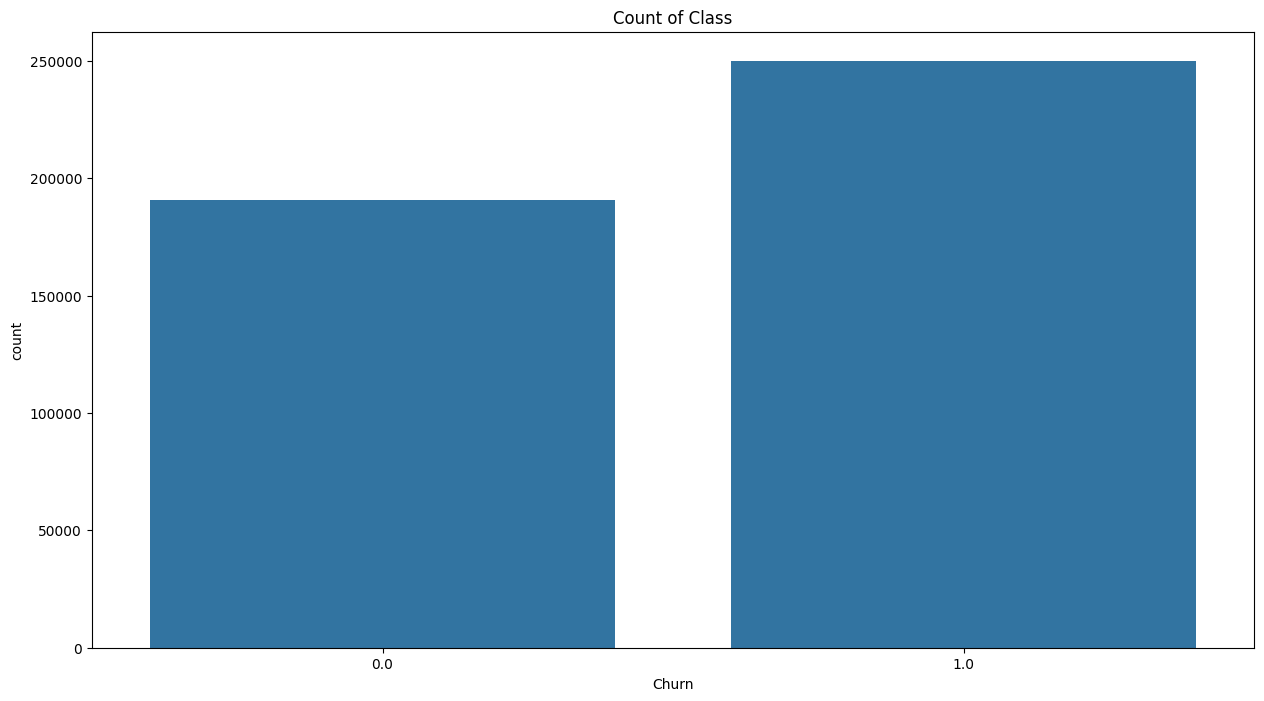

In [ ]:
plt.figure(figsize=(15,8))
plt.title('Count of Class')
sns.countplot(data=df, x='Churn')

# **3.1 Descrete Data**

In [ ]:
def make_histogram(df, target_feature, bins = 10, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    plt.hist(df[target_feature], bins=bins)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.ylabel('Count')
    plt.xlabel(target_feature)
    plt.title(f"Distribution of {target_feature.lower()}{additional}:\n")
    plt.grid()
    plt.show()
    print(f"Distribution of {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n{df[target_feature].skew():.3f} Skewness\n")

def make_piechart(df, target_feature, additional=''):
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())

    palette_color = sns.color_palette('bright')
    plt.pie(data, labels=keys, colors=palette_color, autopct='%.0f%%')
    plt.title(f"Distribution of Cutomer's {target_feature}:")
    plt.show()
    print_str = f"Distribution of cutomer's {target_feature.lower()}{additional}:"
    for k, v in zip(keys, data):
        print_str += f"\n{v} {k}"
    print(print_str)

def make_barplot(df, target_feature, custom_ticks=None, unit='', additional=''):
    plt.figure(figsize=(10, 5))
    dict_of_val_counts = dict(df[target_feature].value_counts())
    data = list(dict_of_val_counts.values())
    keys = list(dict_of_val_counts.keys())
    plt.bar(keys, data)
    if custom_ticks is not None:
        plt.xticks(custom_ticks)
    plt.xlabel(f'{target_feature.capitalize()}{additional}')
    plt.ylabel('Frequency')
    plt.title(f"Distribution of cutomer's {target_feature.lower()}{additional}\n")
    plt.grid(axis='y')
    plt.show()
    print(f"Distribution of cutomer's {target_feature.lower()}{additional}: {df[target_feature].mean():.2f} ± {df[target_feature].median():.2f} {unit}\nMedian: {df[target_feature].median():.2f} {unit}\nMinimum: {df[target_feature].min()} {unit}\nMaximum: {df[target_feature].max()} {unit}\n\n{df[target_feature].skew():.3f} Skewness\n")

def make_boxplot(df, feature):
    plt.figure(figsize=(10,5))
    sns.boxplot(df, x=feature)
    plt.title(f"Boxplot of {feature}\n")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

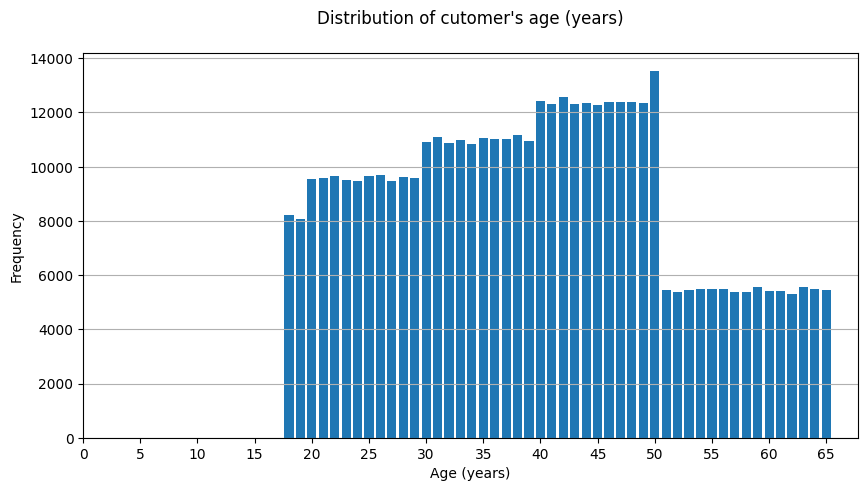

Distribution of cutomer's age (years): 39.37 ± 39.00 years
Median: 39.00 years
Minimum: 18.0 years
Maximum: 65.0 years

0.162 Skewness



In [ ]:
make_barplot(df, 'Age', custom_ticks=np.arange(0, 66, 5), additional=' (years)', unit='years')

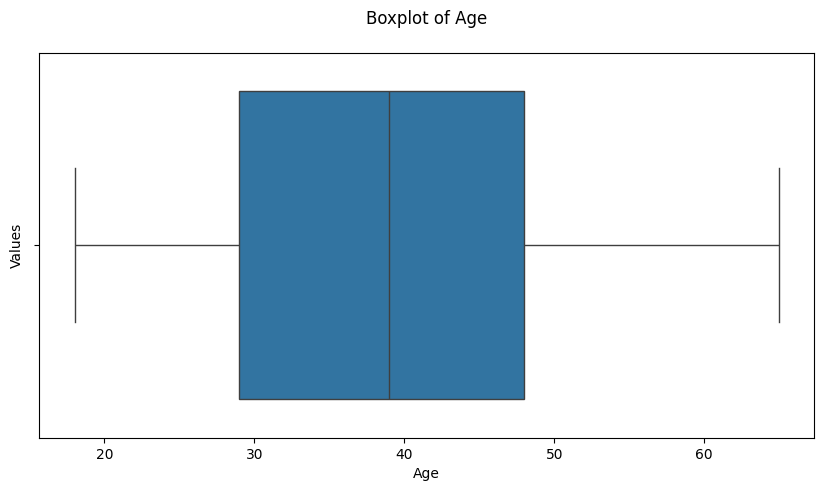

In [ ]:
make_boxplot(df, 'Age')

Hầu hết khách hàng ở độ tuổi 40-50, trong đó độ tuổi 50 là phổ biến nhất. Có số lượng khách hàng từ 51 tuổi trở lên rất thấp.

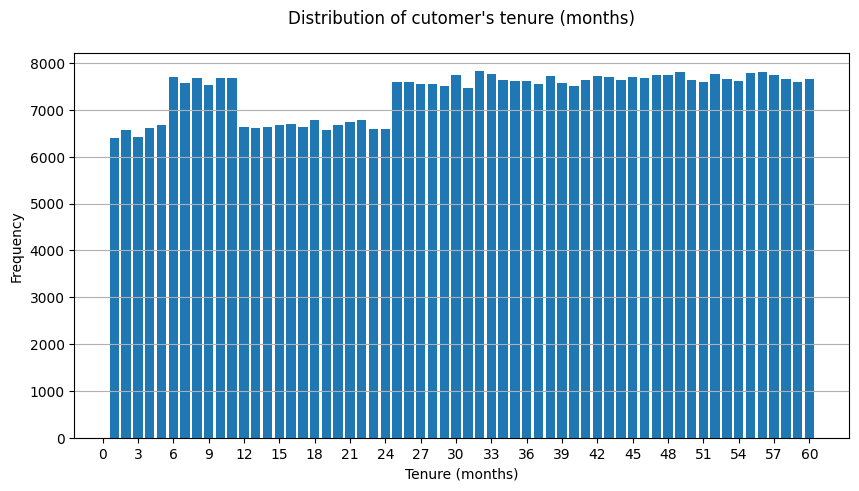

Distribution of cutomer's tenure (months): 31.26 ± 32.00 months
Median: 32.00 months
Minimum: 1.0 months
Maximum: 60.0 months

-0.061 Skewness



In [ ]:
make_barplot(df, 'Tenure', custom_ticks=np.arange(0, 61, 3), additional=' (months)', unit='months')

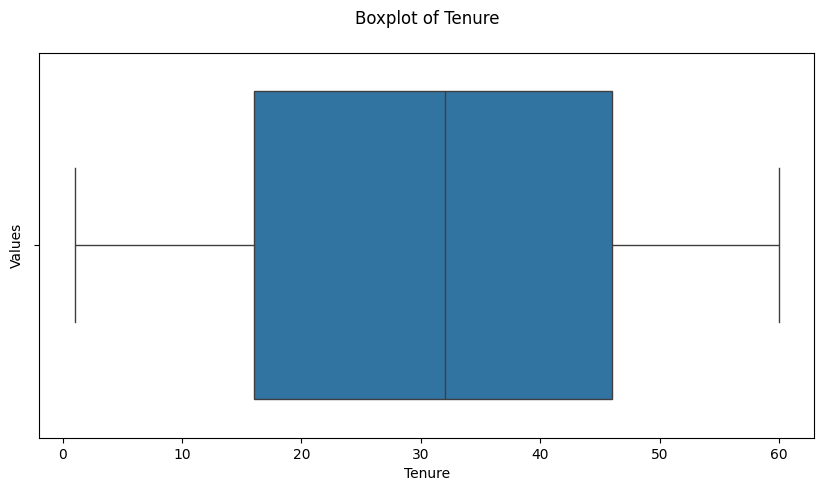

In [ ]:
make_boxplot(df, 'Tenure')

Khách hàng có xu hướng gắn bó lâu hơn với việc khách hàng rời đi phổ biến hơn trong khoảng thời gian thuê 1-5 tháng và 12-24 tháng.

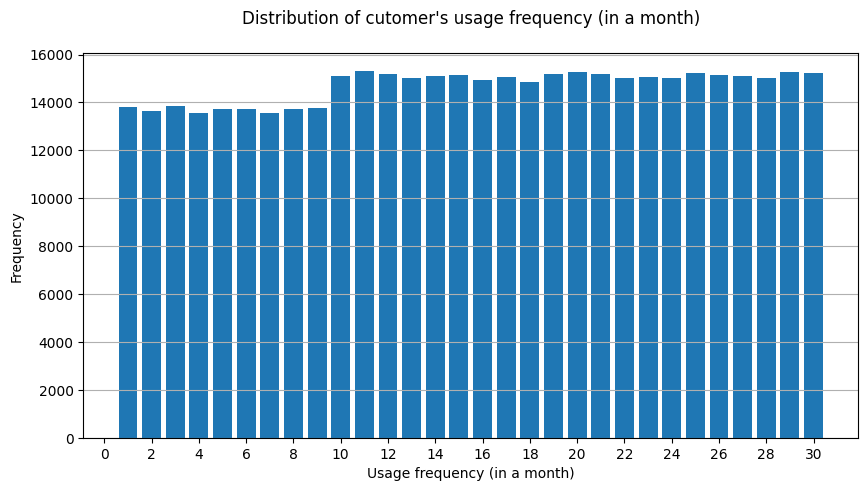

Distribution of cutomer's usage frequency (in a month): 15.81 ± 16.00 times
Median: 16.00 times
Minimum: 1.0 times
Maximum: 30.0 times

-0.043 Skewness



In [ ]:
make_barplot(df, 'Usage Frequency', custom_ticks=np.arange(0, 31, 2), unit='times', additional=' (in a month)')

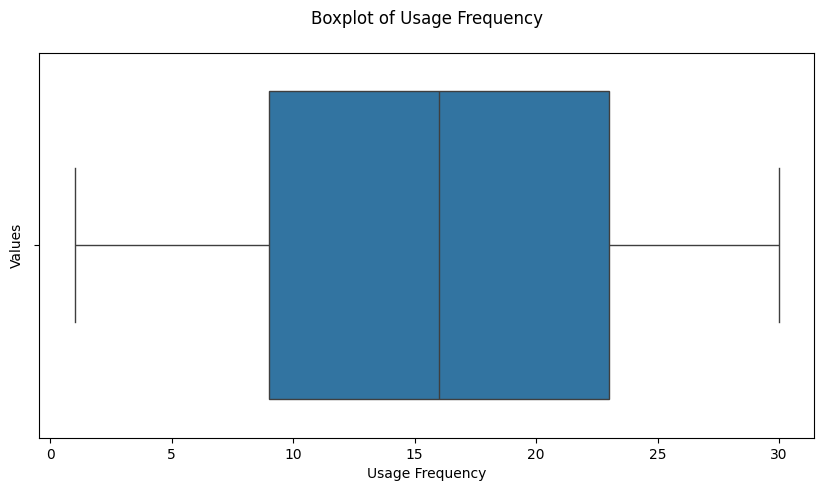

In [ ]:
make_boxplot(df, 'Usage Frequency')


Trung bình, khách hàng có xu hướng sử dụng dịch vụ của công ty 16 lần trong một tháng, với sự thay đổi lớn về tần suất sử dụng của từng cá nhân cho thấy thói quen sử dụng dịch vụ đa dạng.

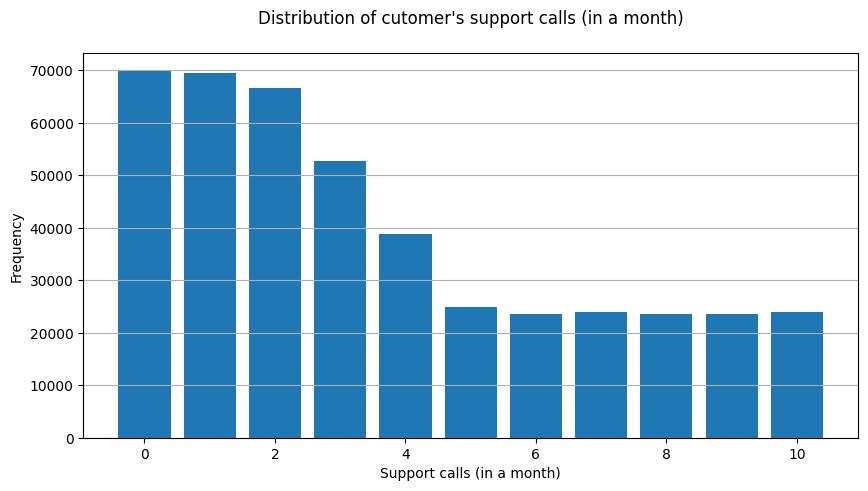

Distribution of cutomer's support calls (in a month): 3.60 ± 3.00 calls
Median: 3.00 calls
Minimum: 0.0 calls
Maximum: 10.0 calls

0.667 Skewness



In [ ]:
make_barplot(df, 'Support Calls', unit='calls', additional=' (in a month)')

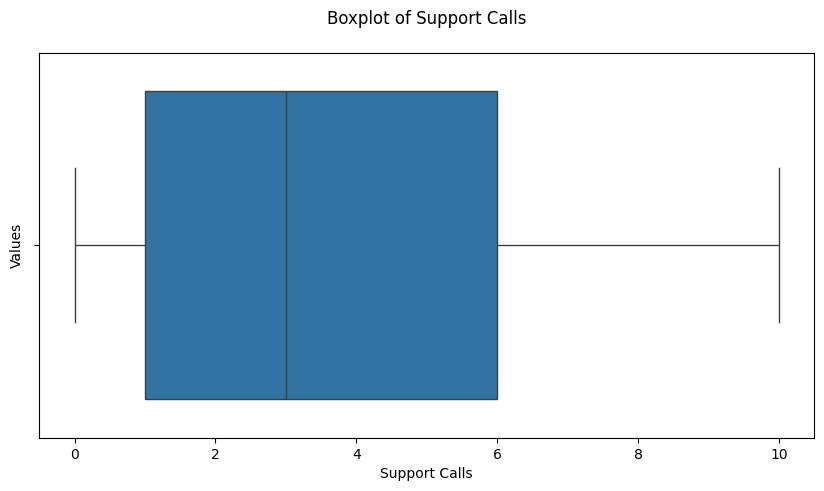

In [ ]:
make_boxplot(df, 'Support Calls')


Trung bình, khách hàng có xu hướng thực hiện 3 cuộc gọi hỗ trợ trong một tháng. Khách hàng có xu hướng thực hiện 1 hoặc 2 cuộc gọi hỗ trợ mỗi tháng, hầu hết không thực hiện cuộc gọi hỗ trợ nào.

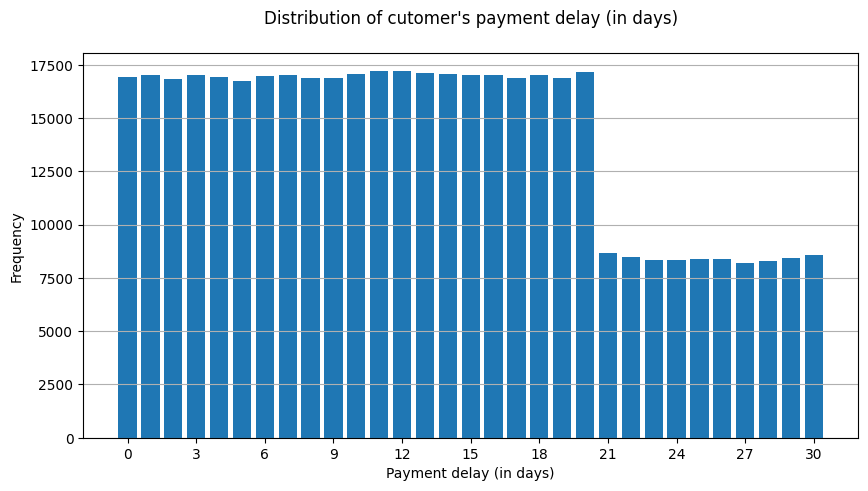

Distribution of cutomer's payment delay (in days): 12.97 ± 12.00 days
Median: 12.00 days
Minimum: 0.0 days
Maximum: 30.0 days

0.267 Skewness



In [ ]:
make_barplot(df, 'Payment Delay', custom_ticks=np.arange(0, 32, 3), unit='days', additional=' (in days)')

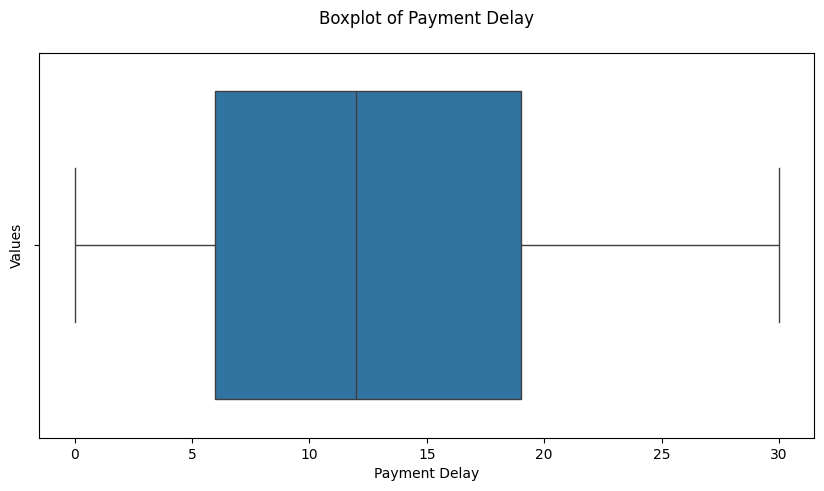

In [ ]:
make_boxplot(df, 'Payment Delay')

Trung bình, khách hàng có xu hướng trì hoãn thanh toán trong 13 ngày, với sự thay đổi lớn về thời gian trì hoãn thanh toán của từng cá nhân cho thấy thói quen thanh toán đa dạng không được ưa chuộng. Hầu hết khách hàng thanh toán trong vòng 20 ngày.

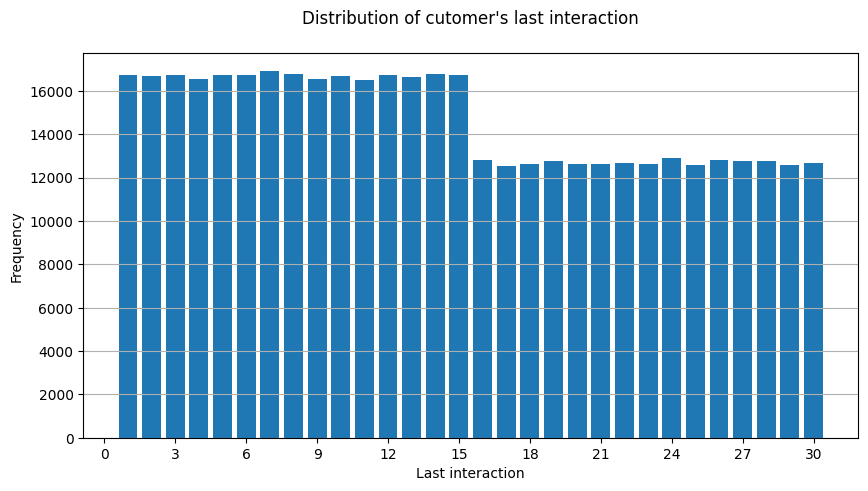

Distribution of cutomer's last interaction: 14.48 ± 14.00 days
Median: 14.00 days
Minimum: 1.0 days
Maximum: 30.0 days

0.177 Skewness



In [ ]:
make_barplot(df, 'Last Interaction', custom_ticks=np.arange(0, 32, 3), unit='days', additional='')

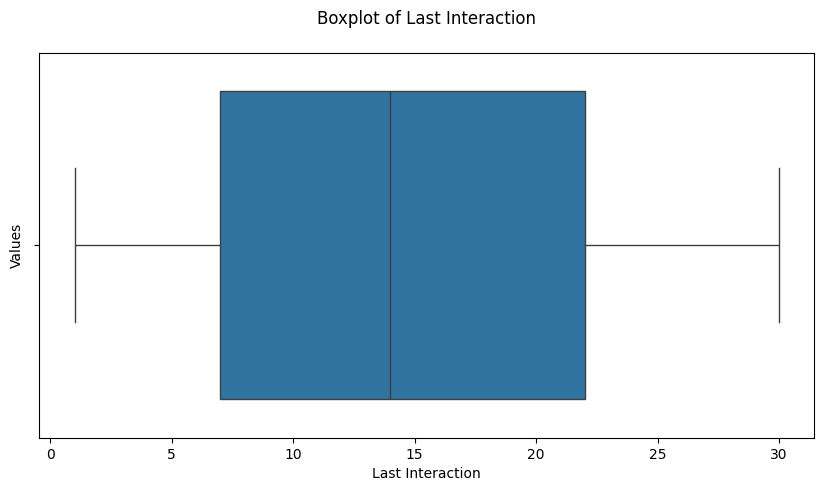

In [ ]:
make_boxplot(df, 'Last Interaction')


Hầu hết khách hàng có xu hướng có 15 lần tương tác cuối cùng hoặc ít hơn, trung bình là khoảng 14 ngày.

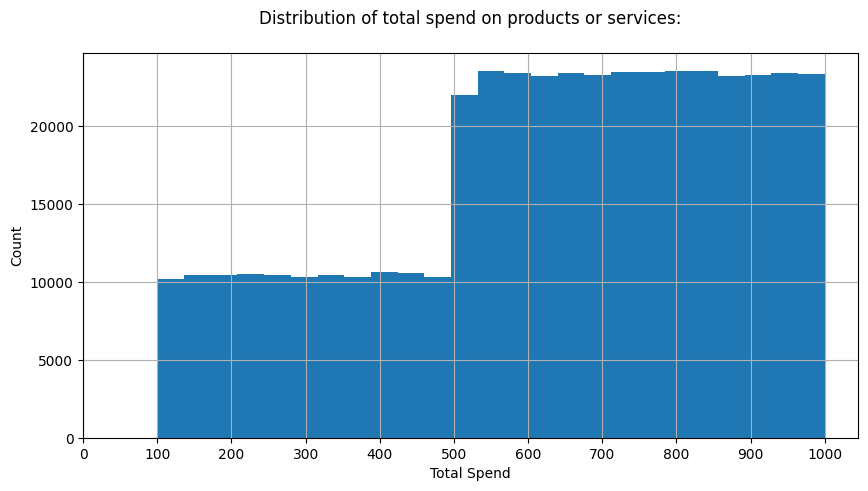

Distribution of total spend on products or services: 631.62 ± 661.00 USD
Median: 661.00 USD
Minimum: 100.0 USD
Maximum: 1000.0 USD
-0.457 Skewness



In [ ]:
make_histogram(df, 'Total Spend', bins=25, custom_ticks=np.arange(0, 1001, 100), unit='USD', additional=" on products or services")

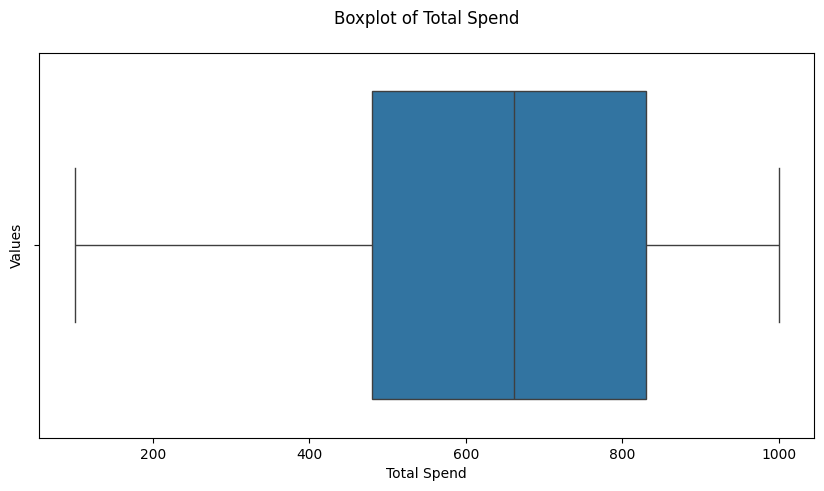

In [ ]:
make_boxplot(df, 'Total Spend')

Trung bình, khách hàng có xu hướng gửi khoảng 631,62 USD, với mức chi tiêu của khách hàng có sự biến động lớn. Hầu hết khách hàng có xu hướng chi hơn 500 USD.

# **3.2 Multivariate Analysis**

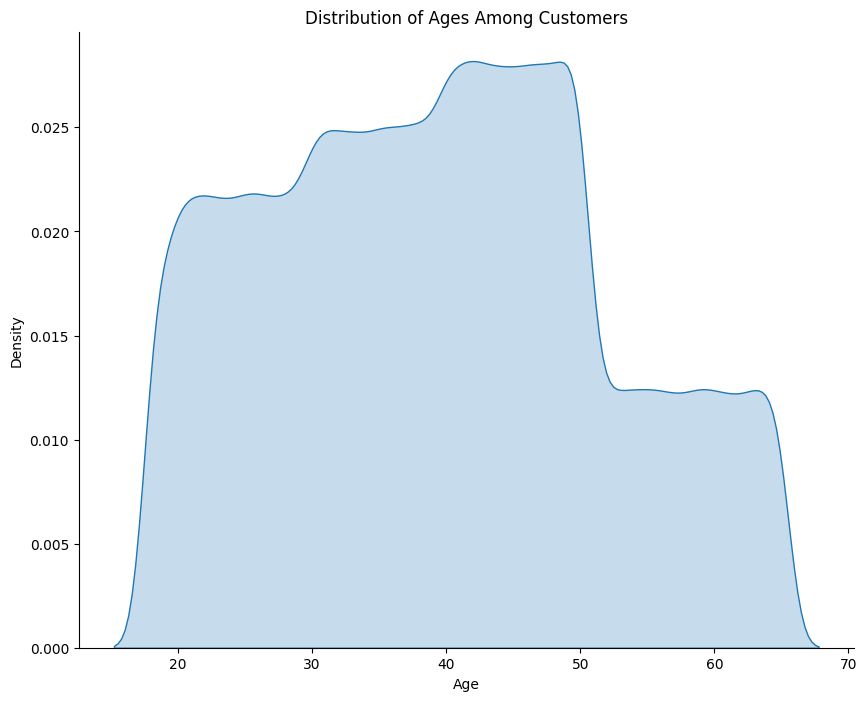

In [ ]:
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df.Age , fill = True , common_norm=False)
plt.title('Distribution of Ages Among Customers')
sns.despine()
plt.show()

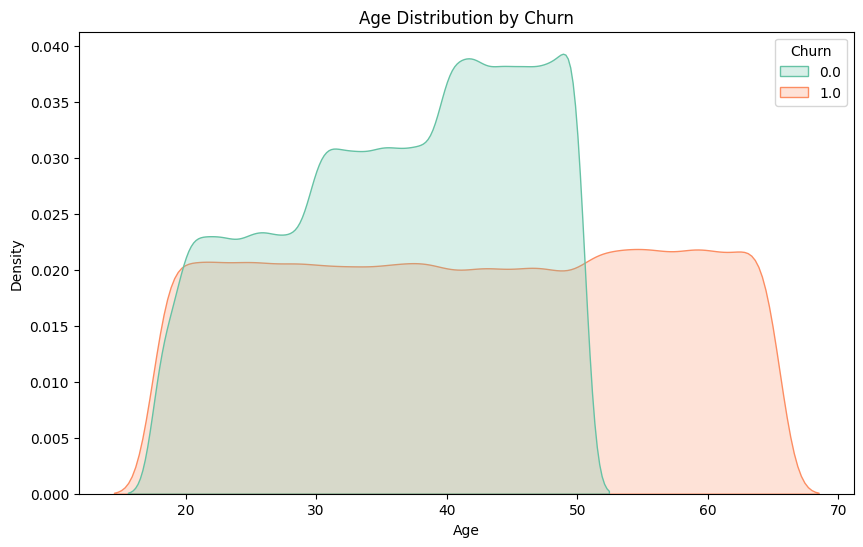

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', common_norm=False, fill=True, palette='Set2')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

Độ tuổi được phân bổ bình thường nhưng hơi lệch, chúng tôi có nhiều Khách hàng trẻ hơn. Chúng tôi có một lượng khách hàng đáng kể ở độ tuổi 40-50, với một nhóm nhỏ hơn nhưng vẫn đáng kể ở độ tuổi 20-30 như bạn có thể thấy. một nửa số khách hàng thuộc nhóm Churn 20-30 nhưng tỷ lệ rời bỏ giảm dần ở các nhóm tuổi tiếp theo cho đến nhóm tuổi 41-50 Tất cả những người trên 60 Churn!!!

In [ ]:
def age_segment(age):
    if age <= 20:
        return 20
    elif age <= 30:
        return 30
    elif age <= 40:
        return 40
    elif age <= 50:
        return 50
    elif age <= 60:
        return 60
    else:
        return 61

# Áp dụng hàm chuyển đổi cho cột 'Age'
df['Age'] = df['Age'].apply(age_segment)

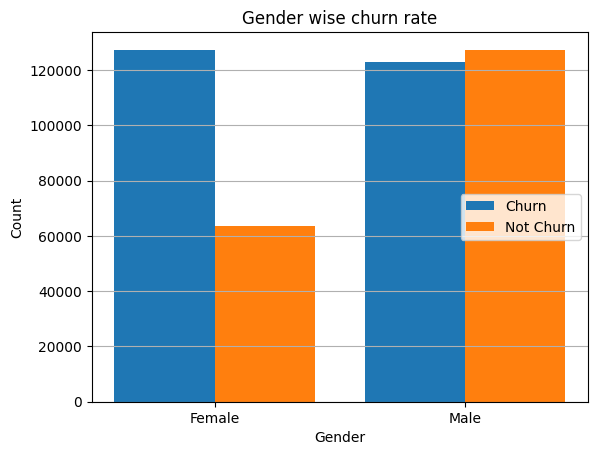

In [ ]:
gender_churn = df.groupby(['Gender', 'Churn']).size().unstack()

X = list(gender_churn.index)
churn_0 = list(gender_churn.iloc[:, 0])
churn_1 = list(gender_churn.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title("Gender wise churn rate")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Có, giới tính và tỷ lệ rời bỏ có mối quan hệ với nhau.

Khách hàng nữ có tỷ lệ rời bỏ cao hơn một chút so với khách hàng nam. Lượng khách hàng nam năng động (không rời bỏ) gần gấp đôi lượng khách hàng nữ

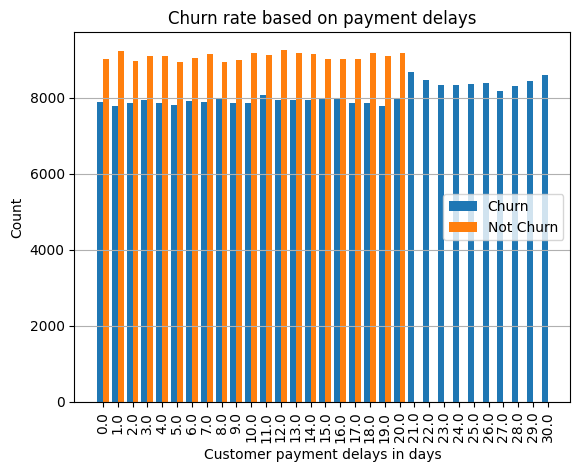

In [ ]:
filtered = df.groupby(['Payment Delay', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Not Churn')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer payment delays in days")
plt.ylabel('Count')
plt.title("Churn rate based on payment delays")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Độ trễ thanh toán thường được phân phối và hơi lệch dương, tỷ lệ rời bỏ quá cao từ 0 đến 20 nhưng giảm đáng kể sau 20 tháng chậm thanh toán

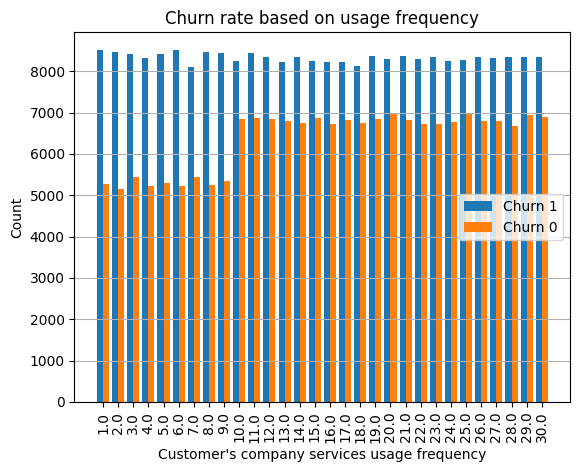

In [ ]:
filtered = df.groupby(['Usage Frequency', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=90)
plt.xlabel("Customer's company services usage frequency")
plt.ylabel('Count')
plt.title("Churn rate based on usage frequency")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Mức sử dụng của khách hàng ở mức trung bình là 15, tần suất sử dụng dường như không ảnh hưởng đến tỷ lệ rời bỏ, chỉ thấp hơn một chút đối với tần suất sử dụng từ 0 - 10

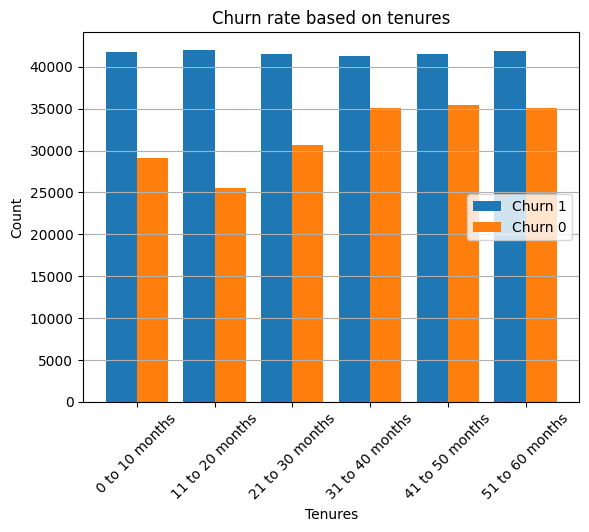

In [ ]:
def categorize_age(Age):
    if 0 <= Age <= 10:
        return '0 to 10 months'
    elif 11 <= Age <= 20:
        return '11 to 20 months'
    elif 21 <= Age <= 30:
        return '21 to 30 months'
    elif 31 <= Age <= 40:
        return '31 to 40 months'
    elif 41 <= Age <= 50:
        return '41 to 50 months'
    elif 51 <= Age <= 60:
        return '51 to 60 months'
    else:
        pass # For nan values

filtered = df.copy()
filtered['Tenure_segmentation'] = df['Tenure'].apply(categorize_age)
filtered = filtered.groupby(['Tenure_segmentation', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Tenures')
plt.ylabel('Count')
plt.title("Churn rate based on tenures")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Không, khách hàng có thời gian sử dụng lâu hơn sẽ có nhiều khả năng rời bỏ hơn

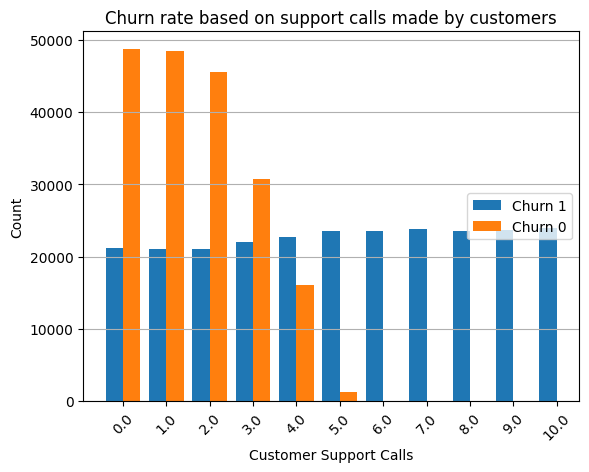

In [ ]:
filtered = df.groupby(['Support Calls', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Customer Support Calls')
plt.ylabel('Count')
plt.title("Churn rate based on support calls made by customers")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Trung bình khách hàng gọi hỗ trợ 3 lần số cuộc gọi hỗ trợ cao hơn nhiều từ 0 đến 3 lần cho mỗi khách hàng và trong phạm vi này, các cuộc gọi dường như thành công do tỷ lệ rời bỏ của khách hàng này khi số cuộc gọi hỗ trợ tăng cao hơn thì tỷ lệ rời bỏ cao hơn quá, đến mức trong hơn 5 cuộc gọi, không có khách hàng nào không rời bỏ và có vẻ như những người hỗ trợ đã không thành công trong việc giải quyết vấn đề của khách hàng

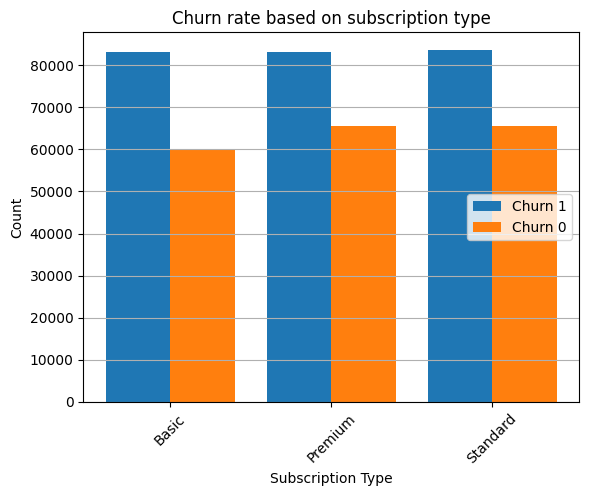

In [ ]:
filtered = df.groupby(['Subscription Type', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Subscription Type')
plt.ylabel('Count')
plt.title("Churn rate based on subscription type")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

=> Không, loại đăng ký không ảnh hưởng đến tỷ lệ khách hàng rời bỏ.

Những khách hàng không bị gián đoạn có xu hướng chọn loại đăng ký cao cấp hoặc tiêu chuẩn nhiều hơn một chút so với đăng ký cơ bản.

In [ ]:
df = df.drop('Subscription Type', axis=1)

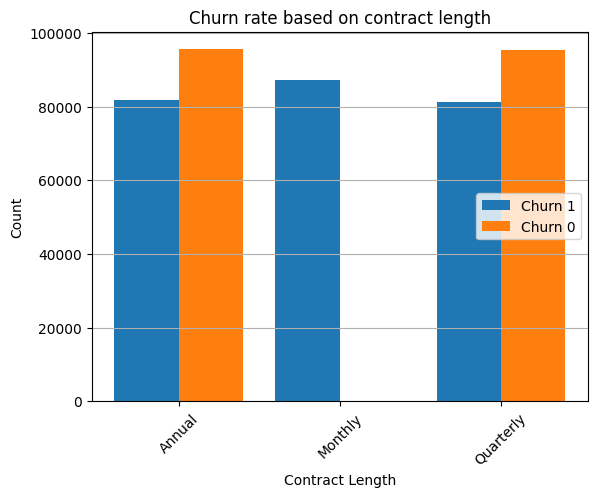

In [ ]:
filtered = df.groupby(['Contract Length', 'Churn']).size().unstack()

X = list(filtered.index)
churn_0 = list(filtered.iloc[:, 0])
churn_1 = list(filtered.iloc[:, 1])

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, churn_1, 0.4, label = 'Churn 1')
plt.bar(X_axis + 0.2, churn_0, 0.4, label = 'Churn 0')

plt.xticks(X_axis, X, rotation=45)
plt.xlabel('Contract Length')
plt.ylabel('Count')
plt.title("Churn rate based on contract length")
plt.legend(loc='center right')
plt.grid(axis='y')
plt.show()

<ipython-input-42-348190b012e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract Length', y='Churn', data=df, palette='Set3')


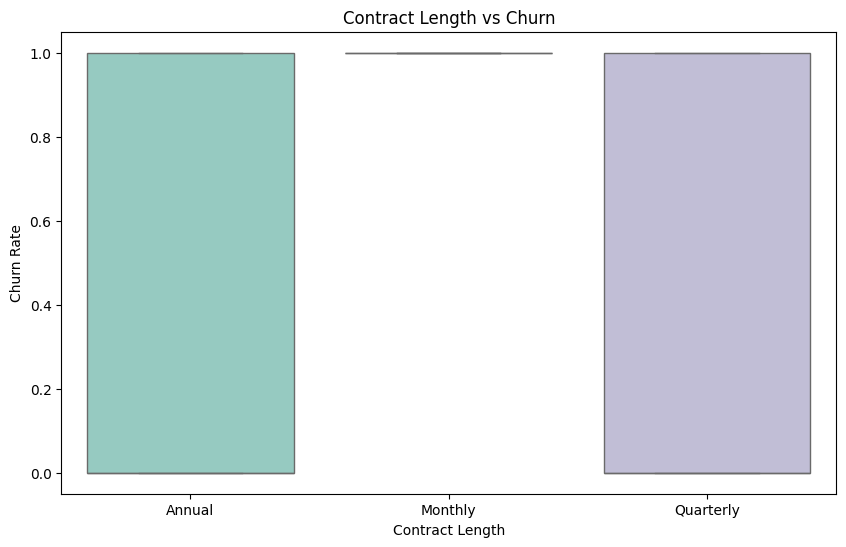

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract Length', y='Churn', data=df, palette='Set3')
plt.xlabel('Contract Length')
plt.ylabel('Churn Rate')
plt.title('Contract Length vs Churn')

plt.show()

In [ ]:
df[(df['Contract Length'] == 'Monthly') & (df['Churn'] == 0)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn


=> Các loại đăng ký có tỷ lệ dữ liệu bằng nhau. Tỷ lệ rời bỏ giữa các loại đăng ký cũng bằng gần một nửa số khách hàng có hợp đồng hàng năm và hàng quý rời bỏ, nhưng tất cả khách hàng có hợp đồng hàng tháng đều rời bỏ.

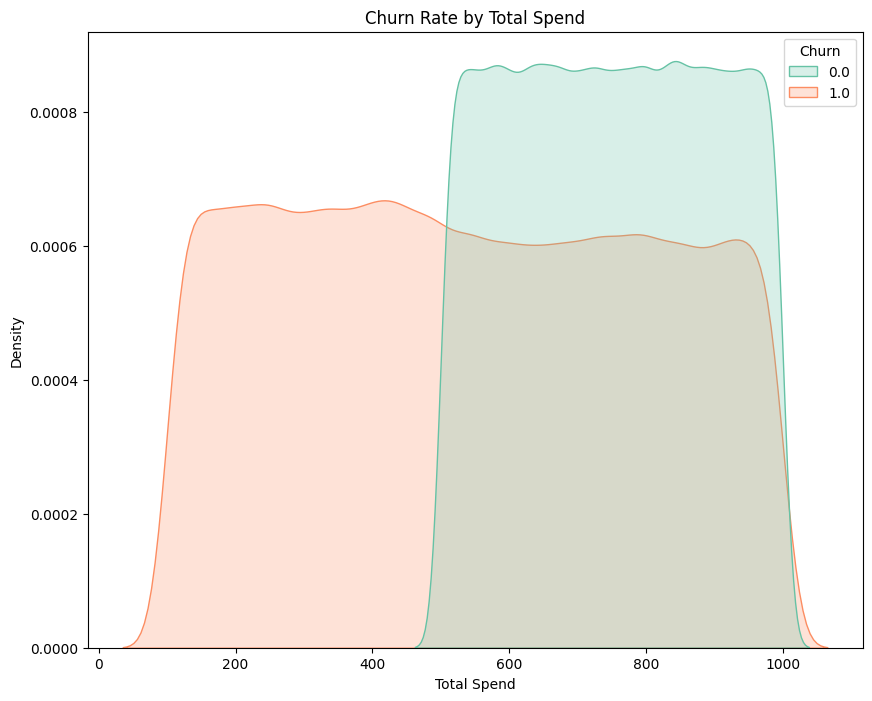

In [ ]:
plt.figure(figsize = (10,8))
sns.kdeplot(data = df , x = 'Total Spend' ,hue = 'Churn', fill = True , palette = 'Set2')
plt.title('Churn Rate by Total Spend')
plt.xlabel('Total Spend')
plt.show()

=>Trrung bình mỗi khách hàng chi khoảng 650 đô, hầu hết những khách hàng chi hơn 500 đô có xu hướng không rời bỏ

# **4 | Data Processing**

# **4.1 | Transform Data**

In [ ]:
# Chuyển đổi dữ liệu chuỗi sang dạng số
df.replace({'Gender': {'Male': 1, 'Female': 2},
            'Subscription Type': {'Basic': 1, 'Standard': 2, 'Premium': 3},
              'Contract Length': {'Monthly': 1, 'Quarterly': 2, 'Annual': 3}}, inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Chọn các cột cần chuẩn hóa
columns_to_scale = ['Support Calls', 'Tenure', 'Usage Frequency', 'Total Spend', 'Last Interaction']

# Khởi tạo StandardScaler
scaler = StandardScaler()

# Chuẩn hóa các cột
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [ ]:
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Contract Length,Total Spend,Last Interaction,Churn
0,30,2,0.448760,-0.210511,0.454549,18.0,3,1.247427,0.293052,1.0
1,61,2,1.028278,-1.724562,2.083100,8.0,1,-0.309865,-0.986584,1.0
2,60,2,-1.000036,-1.375166,0.780259,18.0,2,-1.854698,-1.335575,1.0
3,60,1,0.390808,0.604748,1.105969,7.0,1,-0.978462,1.689018,1.0
4,30,1,0.043097,0.488282,0.454549,8.0,1,-0.060698,0.642043,1.0


# **4.2 | Correlation**

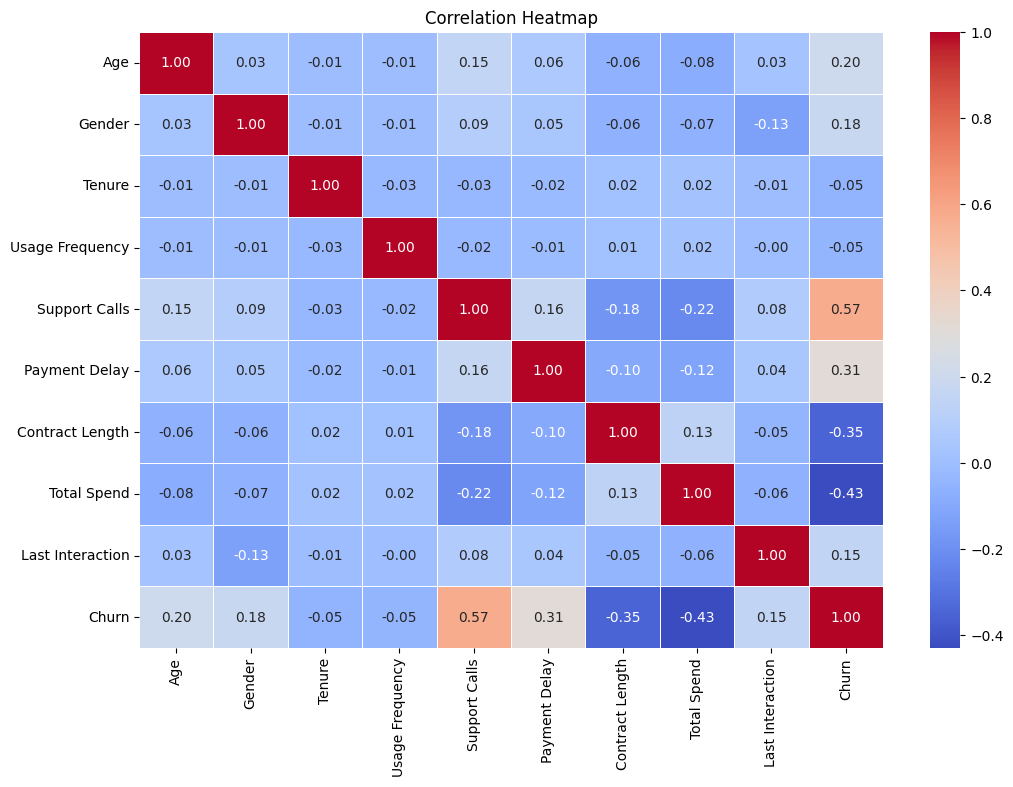

In [ ]:
# Tính toán ma trận tương quan Pearson
correlation_matrix = df.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-49-ace352ce4753>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')


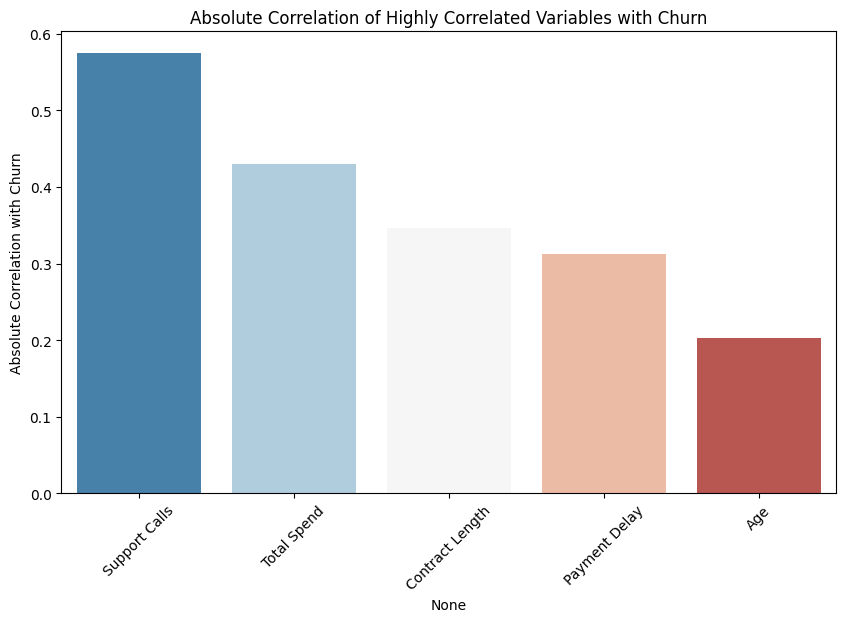

In [ ]:
high_corr_vars = correlation_matrix.abs().nlargest(6, 'Churn')['Churn'].index[1:]
high_corr_values = correlation_matrix.abs().nlargest(6, 'Churn')['Churn'].values[1:]

plt.figure(figsize=(10, 6))
sns.barplot(x=high_corr_vars, y=high_corr_values, palette='RdBu_r')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Absolute Correlation of Highly Correlated Variables with Churn')
plt.xticks(rotation=45)
plt.show()

# **4.3 | Split Data**

In [ ]:
X = df.drop(['Churn'], axis=1)
y = df['Churn']

In [ ]:
#Split your data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **5 | Decision Tree**

In [ ]:
# Tạo mô hình Decision Tree
model = DecisionTreeClassifier(random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9903705468032257
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     38063
         1.0       0.99      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



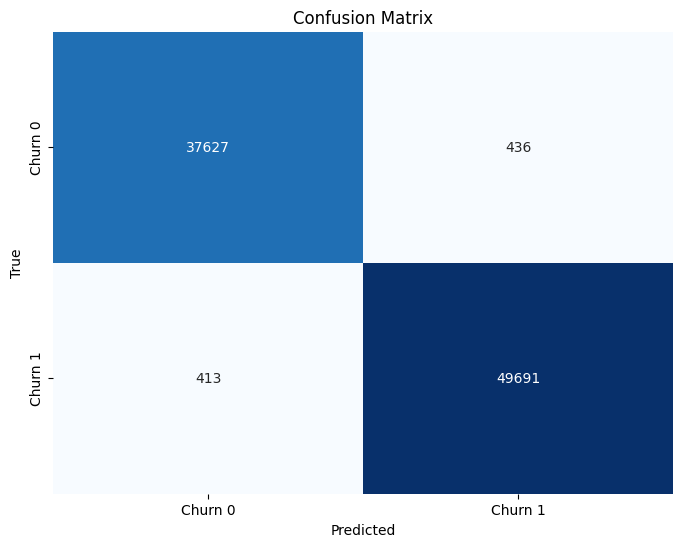

In [ ]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận dự đoán bằng cách sử dụng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Churn 0', 'Churn 1'], yticklabels=['Churn 0', 'Churn 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

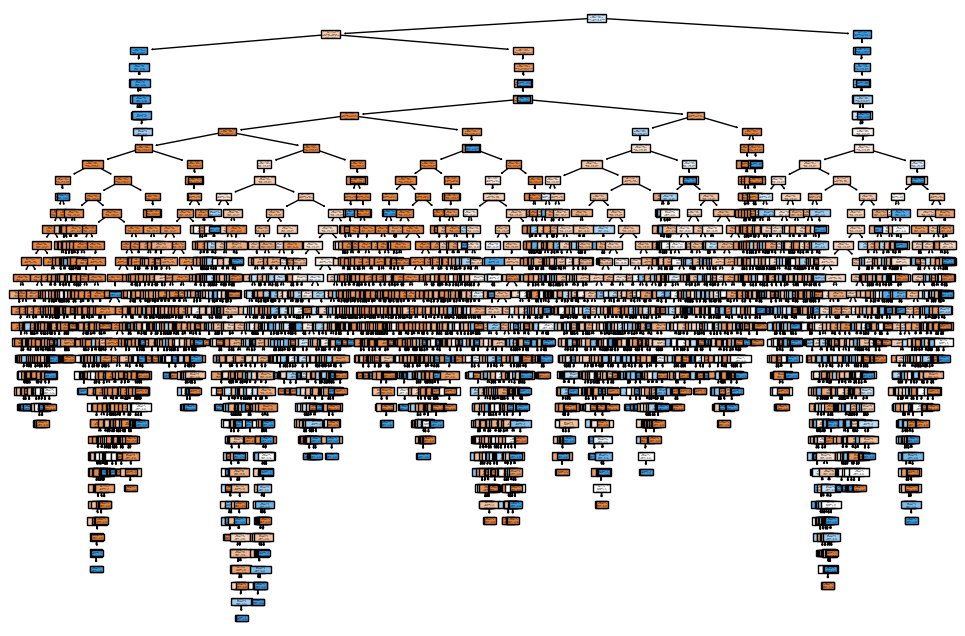

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=['Churn 0', 'Churn 1'], filled=True)
plt.show()

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(3, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the DecisionTreeClassifier with the current max_depth
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 3: Test Score = 0.9231685324441118
Max Depth = 4: Test Score = 0.9549604727392335
Max Depth = 5: Test Score = 0.9752288271121848
Max Depth = 6: Test Score = 0.9752288271121848
Max Depth = 7: Test Score = 0.9780189866957024
Max Depth = 8: Test Score = 0.9884423877414452
Max Depth = 9: Test Score = 0.9898147833089478
Max Depth = 10: Test Score = 0.9908128891762223
Max Depth = 11: Test Score = 0.9922079689679812
Max Depth = 12: Test Score = 0.9930246010412059
Max Depth = 13: Test Score = 0.9931039958261028
Max Depth = 14: Test Score = 0.9931153379382308
Max Depth = 15: Test Score = 0.9926956797894904
Max Depth = 16: Test Score = 0.9921058899588281
Max Depth = 17: Test Score = 0.9922079689679812
Max Depth = 18: Test Score = 0.9919357582769063
Max Depth = 19: Test Score = 0.9916068370251908
Best Max Depth = 14: Best Test Score = 0.9931153379382308


In [ ]:
# Tạo mô hình Decision Tree
model = DecisionTreeClassifier(max_depth=14,random_state=42)

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9931153379382308
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     38063
         1.0       1.00      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



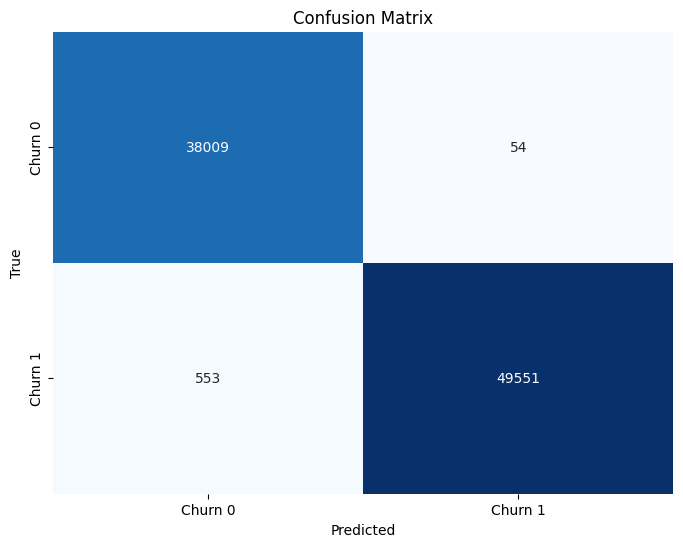

In [ ]:
# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)
# Hiển thị ma trận dự đoán bằng cách sử dụng biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Churn 0', 'Churn 1'], yticklabels=['Churn 0', 'Churn 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#đánh giá độ chính xác của mô hình
from sklearn.model_selection import cross_val_score
# Perform 10-fold cross-validation
scores = cross_val_score(model, X, y, cv=10)
# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
# điểm xác thực chéo
print("Mean CV Score:", scores.mean())

Cross-Validation Scores: [0.99299065 0.99324018 0.99251412 0.99324002 0.99376177 0.9934215
 0.99333076 0.99328539 0.99333076 0.99280902]
Mean CV Score: 0.9931924183226368


            Feature  Importance
4     Support Calls    0.361589
7     Total Spend\t    0.247001
6   Contract Length    0.138707
5   Payment Delay\t    0.104888
0               Age    0.097172
8  Last Interaction    0.036129
2            Tenure    0.007434
1            Gender    0.005780
3   Usage Frequency    0.001299


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


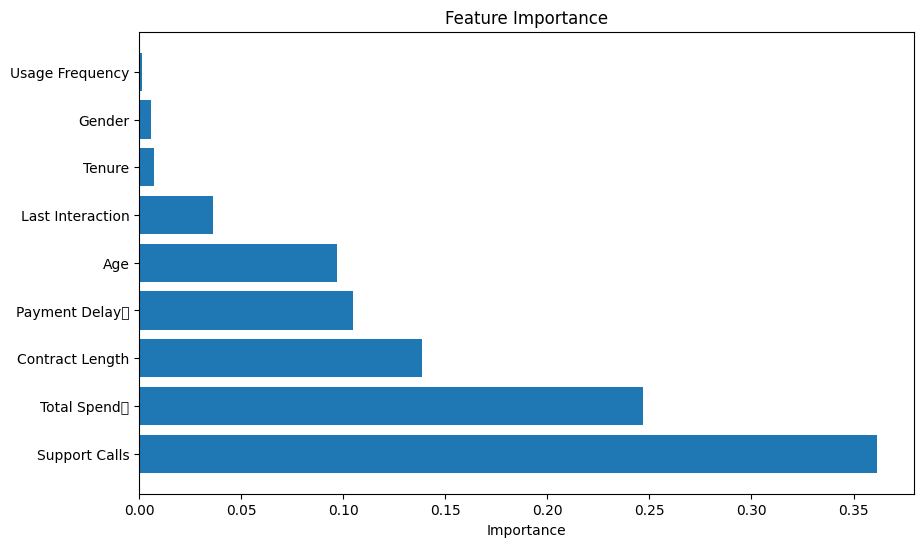

In [ ]:
# Lấy đặc trưng quan trọng từ mô hình
feature_importances = model.feature_importances_

# Chuyển X_train thành DataFrame (nếu nó chưa là DataFrame)
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay	', 'Contract Length', 'Total Spend	', 'Last Interaction'])  # Thay thế tên thực tế của các đặc trưng

# Tạo DataFrame hiển thị đặc trưng quan trọng
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In kết quả
print(feature_importance_df)

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

In [ ]:
from sklearn.tree import export_text
# Export the text representation of the decision tree
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print(tree_rules)

|--- Support Calls <= 0.29
|   |--- Total Spend <= -0.55
|   |   |--- Total Spend <= -0.55
|   |   |   |--- class: 1.0
|   |   |--- Total Spend >  -0.55
|   |   |   |--- Payment Delay <= -1.15
|   |   |   |   |--- Support Calls <= -0.52
|   |   |   |   |   |--- Gender <= 0.14
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Gender >  0.14
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Support Calls >  -0.52
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Payment Delay >  -1.15
|   |   |   |   |--- Usage Frequency <= -1.55
|   |   |   |   |   |--- Last Interaction <= -0.23
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Last Interaction >  -0.23
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Usage Frequency >  -1.55
|   |   |   |   |   |--- Support Calls <= -0.03
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Support Calls >  -0.03
|   |   |   |   |   |   |--- Contract Length <= 0.40
|   |   |   |   |   

# **6 | Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_nb = nb.predict(X_test)

print("Precision Score:",precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1 Score:",f1_score(y_test, y_pred_nb, average='weighted'))
print("Navy Bayes Accuracy:",accuracy_score(y_test, y_pred_nb))

Precision Score: 0.9346801536846708
Recall Score: 0.9328433540893986
F1 Score: 0.9330477349999308
Navy Bayes Accuracy: 0.9328433540893986


In [ ]:
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Navie Bayes):\n", classification_rep_nb)

Classification Report (Navie Bayes):
               precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     38063
         1.0       0.96      0.92      0.94     50104

    accuracy                           0.93     88167
   macro avg       0.93      0.94      0.93     88167
weighted avg       0.93      0.93      0.93     88167



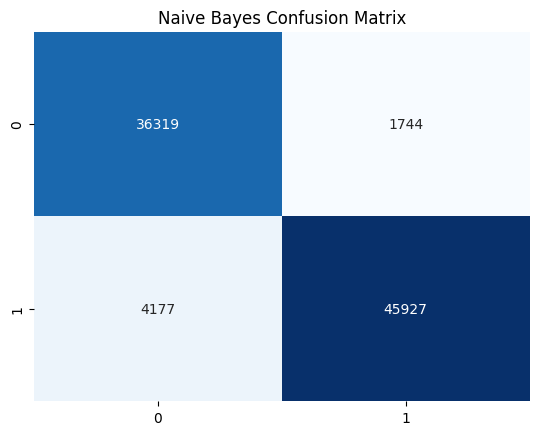

In [ ]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
# Vẽ heatmap của ma trận nhầm lẫn (Navie Bayes)
sns.heatmap(cm_nb,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Naive Bayes Confusion Matrix');
plt.show()

**Tunning Hyperparamete**

In [ ]:
from sklearn.model_selection import GridSearchCV
from itertools import product
# Thiết lập các giá trị bạn muốn thử nghiệm cho tham số
var_smoothing_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Khởi tạo biến để theo dõi giá trị tốt nhất và điểm số tốt nhất
best_var_smoothing = 0
best_score = 0

# Duyệt qua từng giá trị và huấn luyện mô hình
for var_smoothing in var_smoothing_values:
    nb.set_params(var_smoothing=var_smoothing)
    nb.fit(X_train, y_train)

    # Đánh giá mô hình trên tập kiểm thử
    test_score = nb.score(X_test, y_test)

    # Kiểm tra xem có giá trị tốt nhất không
    if test_score > best_score:
        best_score = test_score
        best_var_smoothing = var_smoothing

    # In ra kết quả
    print("var_smoothing: {} - Test set score: {:.2f}".format(var_smoothing, test_score))

# In ra giá trị tốt nhất
print("\nBest result: var_smoothing = {}, Test set score = {:.2f}".format(best_var_smoothing, best_score))

var_smoothing: 0.1 - Test set score: 0.93
var_smoothing: 0.2 - Test set score: 0.92
var_smoothing: 0.3 - Test set score: 0.91
var_smoothing: 0.4 - Test set score: 0.90
var_smoothing: 0.5 - Test set score: 0.90
var_smoothing: 0.6 - Test set score: 0.89
var_smoothing: 0.7 - Test set score: 0.88
var_smoothing: 0.8 - Test set score: 0.88
var_smoothing: 0.9 - Test set score: 0.87

Best result: var_smoothing = 0.1, Test set score = 0.93


In [ ]:
nb = GaussianNB(var_smoothing=0.1)
nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)
print("Gaussian Naive Bayes Accuracy:",accuracy_score(y_test, y_pred_nb))
print("classification_report:\n",classification_report(y_test, y_pred_nb))

Gaussian Naive Bayes Accuracy: 0.928272482901766
classification_report:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     38063
         1.0       0.98      0.89      0.93     50104

    accuracy                           0.93     88167
   macro avg       0.93      0.93      0.93     88167
weighted avg       0.93      0.93      0.93     88167



Training Accuracy =  92.7  %
Testing Accuracy =  92.83  %


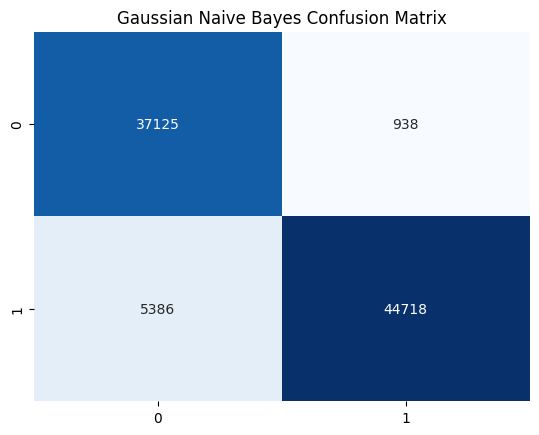

In [ ]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
nb_train_acc = round(accuracy_score(y_train,nb.predict(X_train))*100,2)
nb_test_acc = round(accuracy_score(y_test,y_pred)*100,2)
print('Training Accuracy = ' , nb_train_acc,' %')
print('Testing Accuracy = ' , nb_test_acc,' %')
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', cbar=False,)
plt.title('Gaussian Naive Bayes Confusion Matrix');



*   **Quá trình tinh chỉnh đã giúp giảm dự đoán sai lệch, so sánh confusion matrix sẽ thấy sự khác biệt**




Permutation Importance:
            Feature  Importance
4     Support Calls    0.179273
7       Total Spend    0.105634
6   Contract Length    0.079220
5     Payment Delay    0.044713
0               Age    0.013339
1            Gender    0.005255
8  Last Interaction    0.003875
3   Usage Frequency    0.000092
2            Tenure    0.000074


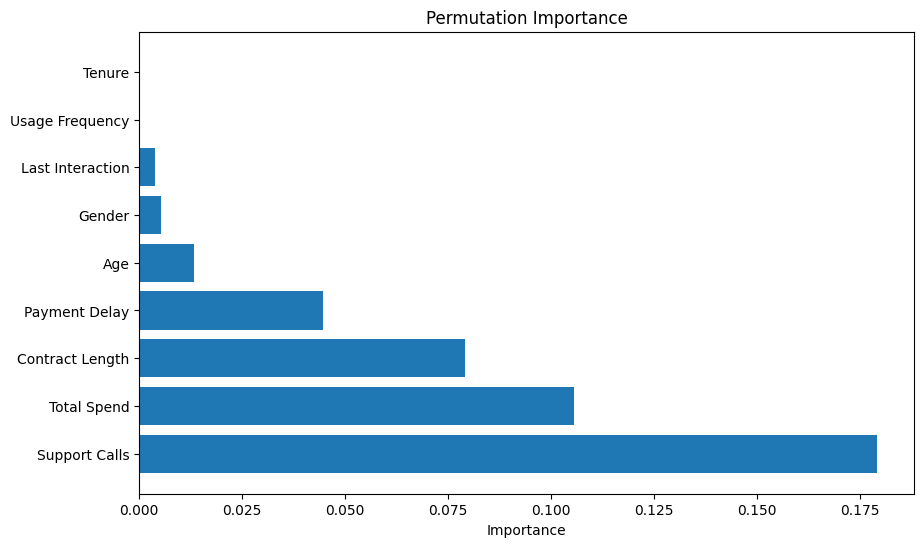

In [ ]:
from sklearn.inspection import permutation_importance
# Tính permutation importance
perm_importance = permutation_importance(nb, X_test, y_test, n_repeats=30, random_state=42)

# Hiển thị kết quả
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': perm_importance.importances_mean})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(feature_importance_df)

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Permutation Importance')
plt.show()

# **7 | Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Khởi tạo mô hình Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Huấn luyện mô hình
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred_rf = rf_classifier.predict(X_test)

# In kết quả
print("Precision Score:",precision_score(y_test, y_pred_rf, average='weighted'))
print("Recall Score:", recall_score(y_test, y_pred_rf, average='weighted'))
print("F1 Score:",f1_score(y_test, y_pred_rf, average='weighted'))
print("Random Forest Accuracy:",accuracy_score(y_test, y_pred_rf))

Precision Score: 0.9928640774217744
Recall Score: 0.9928091009107716
F1 Score: 0.9928136958012737
Random Forest Accuracy: 0.9928091009107716


In [ ]:
 classification_rep_rf = classification_report(y_test, y_pred_rf)
 print("Classification Report (Random Forest):\n", classification_rep_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     38063
         1.0       1.00      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



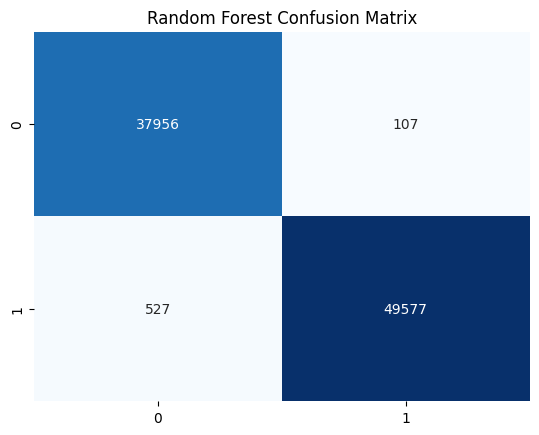

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Vẽ heatmap của ma trận nhầm lẫn (Random Forest)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.show()

 ***Tunning Hyperparamete***

In [ ]:
#Find the best max-depth for DT algorithm
# Define a range of max_depth values to iterate over
max_depth_values = range(1, 20)  # You can adjust this range

# Initialize variables to keep track of the best max depth and corresponding score
best_max_depth = None
best_score = 0.0

# Iterate over different max_depth values
for max_depth in max_depth_values:
    # Initialize the RandomForestClassifier with the current max_depth
    clf = RandomForestClassifier(max_depth=max_depth, random_state=42, criterion = 'entropy')
    # Fit the model to the training data
    clf.fit(X_train, y_train)
    # Evaluate the model on the test data
    test_score = clf.score(X_test, y_test)
    # Perform cross-validation on the training data
    #cv_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    # Print the score for the current max_depth
    print(f"Max Depth = {max_depth}: Test Score = {test_score}")
    # Check if the current model has a better score than the previous best
    if test_score > best_score:
        best_score = test_score
        best_max_depth = max_depth

# Print the best max depth and corresponding score
print(f"Best Max Depth = {best_max_depth}: Best Test Score = {best_score}")

Max Depth = 1: Test Score = 0.9335125387049577
Max Depth = 2: Test Score = 0.9549604727392335
Max Depth = 3: Test Score = 0.9607562920367031
Max Depth = 4: Test Score = 0.9752515113364411
Max Depth = 5: Test Score = 0.9752515113364411
Max Depth = 6: Test Score = 0.9758299590549753
Max Depth = 7: Test Score = 0.9868431499313802
Max Depth = 8: Test Score = 0.9868431499313802
Max Depth = 9: Test Score = 0.9869905973890458
Max Depth = 10: Test Score = 0.9872514659679925
Max Depth = 11: Test Score = 0.9901437045606633
Max Depth = 12: Test Score = 0.9914480474553972
Max Depth = 13: Test Score = 0.993035943153334
Max Depth = 14: Test Score = 0.9932401011716402
Max Depth = 15: Test Score = 0.993217416947384
Max Depth = 16: Test Score = 0.9931833906109996
Max Depth = 17: Test Score = 0.9931153379382308
Max Depth = 18: Test Score = 0.9931607063867434
Max Depth = 19: Test Score = 0.9931380221624871
Best Max Depth = 14: Best Test Score = 0.9932401011716402


In [ ]:
# Initialize the Decision Tree classifier
rdfs_classifier = RandomForestClassifier(max_depth=14, random_state = 42, criterion = 'entropy')
#dt_classifier = DecisionTreeClassifier( random_state=42)
# Train the model on the training set
rdfs_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rdfs_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"RDFS Tree Accuracy: {accuracy}")
# Classification Report
print('-'*53)
#Report
print(' Classifier Report:\n\n{}\n'.format(classification_report(y_test, y_pred)))

RDFS Tree Accuracy: 0.9932401011716402
-----------------------------------------------------
 Classifier Report:

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.99      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167




**Sau khi tinh chỉnh tìm ra được Max Depth tốt nhất thì điểm Accuracy tương tự với điểm ban đầu khi chưa được tinh chỉnh**

            Feature  Importance
4     Support Calls    0.299206
7     Total Spend\t    0.215108
6   Contract Length    0.137237
0               Age    0.132278
5   Payment Delay\t    0.126722
8  Last Interaction    0.038337
1            Gender    0.037217
2            Tenure    0.009066
3   Usage Frequency    0.004830


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


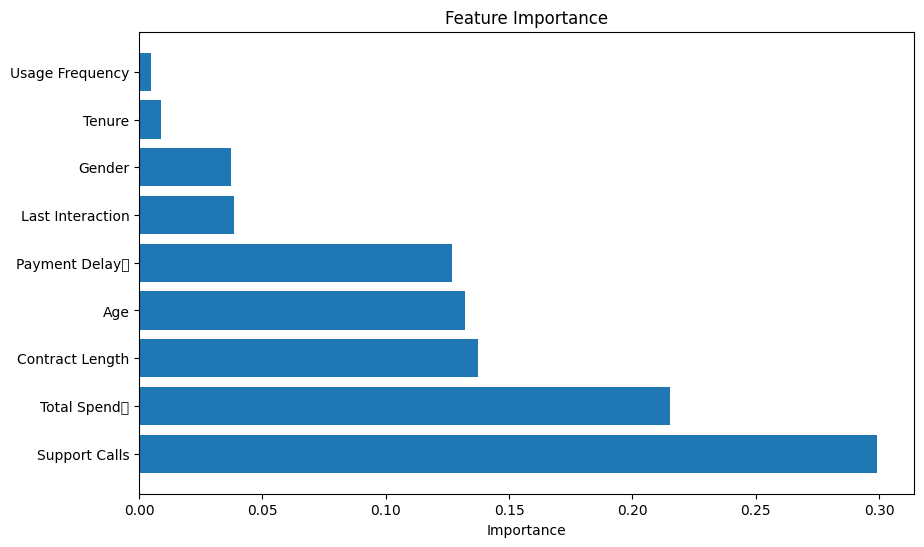

In [ ]:
# Lấy đặc trưng quan trọng từ mô hình
feature_importances = rdfs_classifier.feature_importances_

# Chuyển X_train thành DataFrame (nếu nó chưa là DataFrame)
X_train_df = pd.DataFrame(X_train, columns=['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay	', 'Contract Length', 'Total Spend	', 'Last Interaction'])  # Thay thế tên thực tế của các đặc trưng

# Tạo DataFrame hiển thị đặc trưng quan trọng
feature_importance_df = pd.DataFrame({'Feature': X_train_df.columns, 'Importance': feature_importances})

# Sắp xếp theo độ quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# In kết quả
print(feature_importance_df)

# Vẽ biểu đồ đặc trưng quan trọng
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

# **8 | Comparing Models**

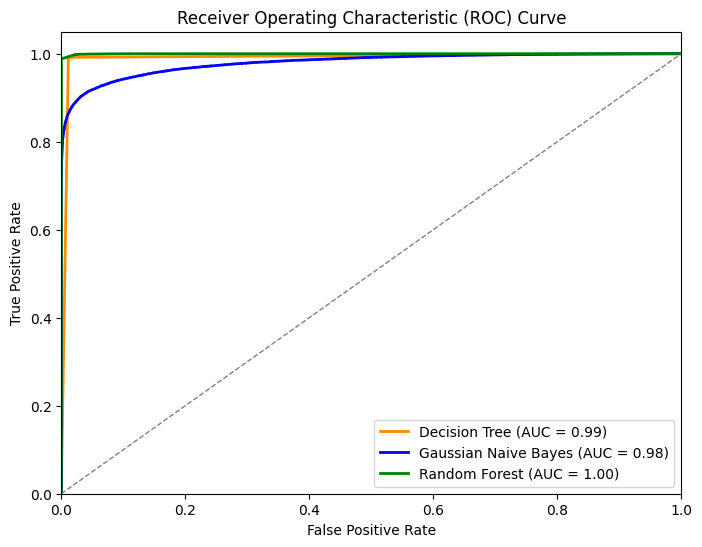

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Initialize the classifiers
dt_classifier = DecisionTreeClassifier(random_state=42)
nb_classifier = GaussianNB(var_smoothing=0.1)
rdfs_classifier = RandomForestClassifier(max_depth=16, random_state=42, criterion='entropy')

# Train the models
dt_classifier.fit(X_train, y_train)
nb_classifier.fit(X_train, y_train)
rdfs_classifier.fit(X_train, y_train)

# Predict probabilities for positive class (class 1) for each model
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
y_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
y_prob_rdfs = rdfs_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each model
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_rdfs, tpr_rdfs, _ = roc_curve(y_test, y_prob_rdfs)
roc_auc_rdfs = auc(fpr_rdfs, tpr_rdfs)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Gaussian Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_rdfs, tpr_rdfs, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rdfs:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


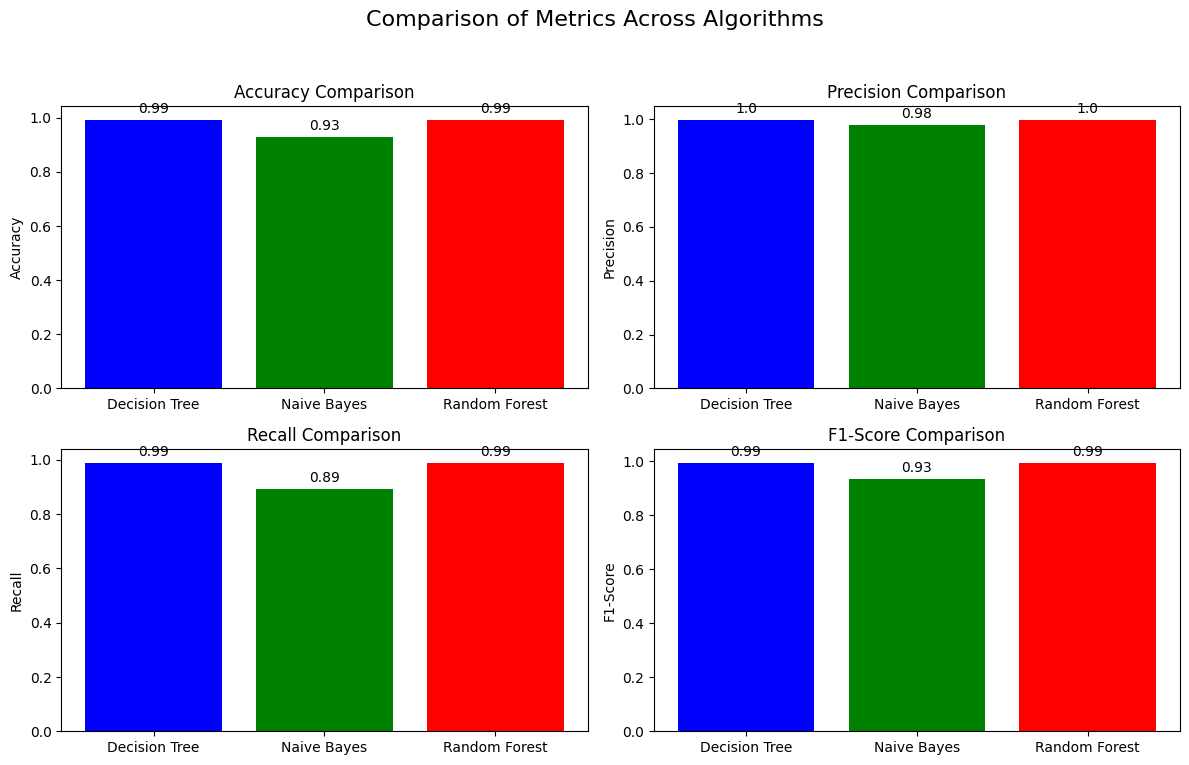

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Dự đoán trên tập kiểm tra
y_pred = model.fit(X_train, y_train).predict(X_test)
y_pred_nb = nb.fit(X_train, y_train).predict(X_test)
y_pred_rf = rf_classifier.fit(X_train, y_train).predict(X_test)

# Dữ liệu
algorithms = ['Decision Tree', 'Naive Bayes', 'Random Forest']
accuracy_scores = [accuracy_score(y_test, y_pred),
                   accuracy_score(y_test, y_pred_nb),
                   accuracy_score(y_test, y_pred_rf)]

precision_scores = [precision_score(y_test, y_pred),
                    precision_score(y_test, y_pred_nb),
                    precision_score(y_test, y_pred_rf)]

recall_scores = [recall_score(y_test, y_pred),
                 recall_score(y_test, y_pred_nb),
                 recall_score(y_test, y_pred_rf)]

f1_scores = [f1_score(y_test, y_pred),
              f1_score(y_test, y_pred_nb),
              f1_score(y_test, y_pred_rf)]

# Vẽ biểu đồ
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Comparison of Metrics Across Algorithms', fontsize=16)

# Accuracy
rects1 = axes[0, 0].bar(algorithms, accuracy_scores, color=['blue', 'green', 'red'])
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_title('Accuracy Comparison')

# Precision
rects2 = axes[0, 1].bar(algorithms, precision_scores, color=['blue', 'green', 'red'])
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision Comparison')

# Recall
rects3 = axes[1, 0].bar(algorithms, recall_scores, color=['blue', 'green', 'red'])
axes[1, 0].set_ylabel('Recall')
axes[1, 0].set_title('Recall Comparison')

# F1-Score
rects4 = axes[1, 1].bar(algorithms, f1_scores, color=['blue', 'green', 'red'])
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_title('F1-Score Comparison')

# Thêm chú giải trên mỗi thanh
def autolabel(rects, scores, axes):
    for rect, score in zip(rects, scores):
        height = rect.get_height()
        axes.annotate('{}'.format(round(score, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, accuracy_scores, axes[0, 0])
autolabel(rects2, precision_scores, axes[0, 1])
autolabel(rects3, recall_scores, axes[1, 0])
autolabel(rects4, f1_scores, axes[1, 1])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# **Compare real data**

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# # Load the data
# data = pd.read_excel("/content/sample_data/Book3.xlsx")
# # Print column names
# print(data.columns)

In [ ]:
# data.head(20)

In [ ]:
# data = data.drop(['CustomerID','Churn'], axis=1)
# y_pred_2 = model.predict(data)

In [ ]:
# print(y_pred_2)

# 1. Decision Tree

Điểm mạnh:
*   Có độ chính xác ổn định
*   Dễ hiểu và dễ diễn giải cho người mới.
*   Không yêu cầu nhiều tiền xử lý dữ liệu.

Điểm yếu:
*   Trên dữ liệu hình ảnh phức tạp có thể bị overfitting trên dữ liệu phức tạp.


---


## 2. Naive Bayes
**Điểm mạnh:**
- Đơn giản và dễ triển khai.

**Điểm yếu:**
- Hoạt động kém khi giả định độc lập không được đáp ứng.
---
## 3. Random Forest
**Điểm mạnh:**
- Độ chính xác cao hơn so với Decision Tree và Naive Bayes
- Hiệu suất tốt trên dữ liệu có số lượng chiều lớn

**Điểm yếu:**
- Yêu cầu độ phức tạp và thời gian huấn luyện cao hơn so với Naive Bayes và Decision Tree.
- Có thể không hiệu quả trên dữ liệu có nhiễu hoặc không đồng nhất.



